# Support Vector Machine

# Import Libraries

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


# Load and Preprocess the Data

In [2]:
# Load dataset
user_details_data = pd.read_csv("/Users/akhilaannireddy/Projects/Machine_learning_project/Dataset/cleaned_user_data.csv")

# Create Binary Target Column

In [3]:
# Create expertise level from reputation
expertise_labels = ['Beginner', 'Intermediate', 'Advanced', 'Expert']
user_details_data['expertise_level'] = pd.qcut(user_details_data['reputation'], q=4, labels=expertise_labels)

# Convert to binary classification
user_details_data['expertise_binary'] = user_details_data['expertise_level'].apply(lambda x: 'Low' if x in ['Beginner', 'Intermediate'] else 'High')


# Drop Irrelevant Columns

In [4]:
# Drop unnecessary columns
drop_cols = [
    'user_id', 'display_name', 'profile_image', 'link', 'account_id',
    'last_modified_date', 'last_access_date', 'creation_date',
    'is_employee', 'account_age_years', 'reputation', 'expertise_level'
]
user_details_data.drop(columns=drop_cols, inplace=True)


# Handle Missing Values and Encode Categorical Columns

In [5]:
# Fill missing values
user_details_data = user_details_data.fillna(0)

# Encode categorical columns
for col in user_details_data.select_dtypes(include='object').columns:
    user_details_data[col] = LabelEncoder().fit_transform(user_details_data[col].astype(str))

# Encode target column
label_encoder = LabelEncoder()
user_details_data['expertise_binary_encoded'] = label_encoder.fit_transform(user_details_data['expertise_binary'])
user_details_data.drop(columns=['expertise_binary'], inplace=True)


In [6]:
user_details_data.to_csv("cleaned data for svm.csv")

# Train-Test Split and Feature Scaling

In [7]:
# Split features and target
X = user_details_data.drop(columns=['expertise_binary_encoded'])
y = user_details_data['expertise_binary_encoded']

# Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Convert scaled arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)
y_train_df = pd.DataFrame(y_train, columns=['expertise_binary_encoded'])
y_test_df = pd.DataFrame(y_test, columns=['expertise_binary_encoded'])

X_train_scaled_df.to_csv("train_data svm.csv")
X_test_scaled_df.to_csv("test_data for svm.csv")

### SVM Models


Kernel: Linear, C: 0.001
Accuracy: 0.7359
              precision    recall  f1-score   support

         Low       0.81      0.62      0.70     10479
        High       0.69      0.86      0.76     10481

    accuracy                           0.74     20960
   macro avg       0.75      0.74      0.73     20960
weighted avg       0.75      0.74      0.73     20960



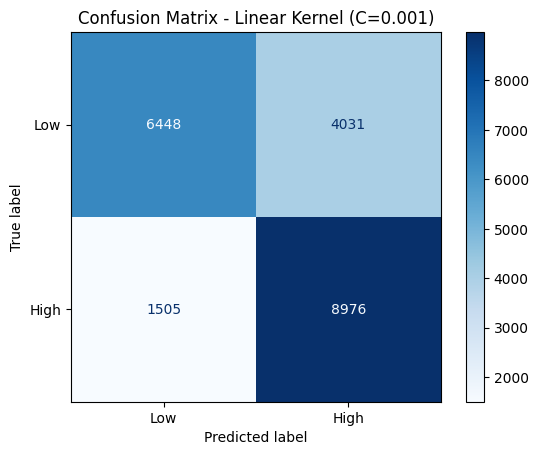


Kernel: Linear, C: 0.01
Accuracy: 0.7479
              precision    recall  f1-score   support

         Low       0.82      0.64      0.72     10479
        High       0.70      0.86      0.77     10481

    accuracy                           0.75     20960
   macro avg       0.76      0.75      0.74     20960
weighted avg       0.76      0.75      0.74     20960



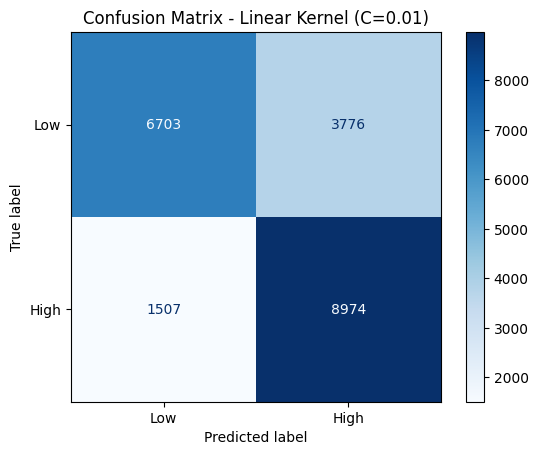


Kernel: Linear, C: 0.1
Accuracy: 0.7495
              precision    recall  f1-score   support

         Low       0.81      0.65      0.72     10479
        High       0.71      0.85      0.77     10481

    accuracy                           0.75     20960
   macro avg       0.76      0.75      0.75     20960
weighted avg       0.76      0.75      0.75     20960



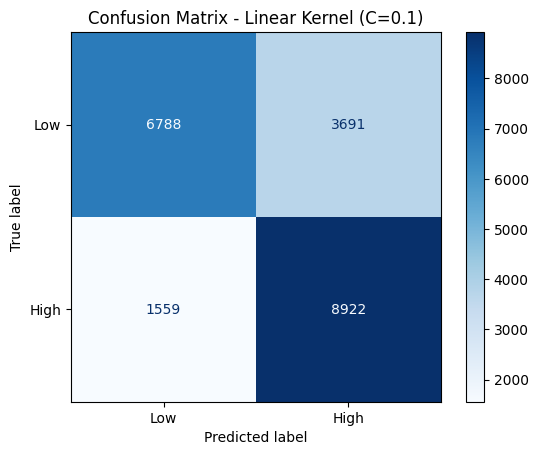


Kernel: Poly, C: 0.001
Accuracy: 0.5577
              precision    recall  f1-score   support

         Low       0.99      0.12      0.21     10479
        High       0.53      1.00      0.69     10481

    accuracy                           0.56     20960
   macro avg       0.76      0.56      0.45     20960
weighted avg       0.76      0.56      0.45     20960



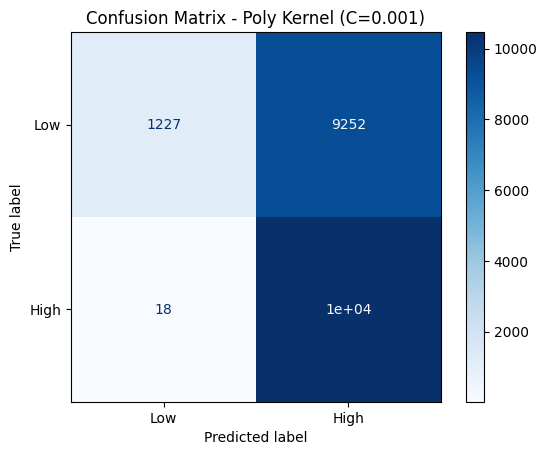


Kernel: Poly, C: 0.01
Accuracy: 0.6302
              precision    recall  f1-score   support

         Low       0.94      0.28      0.43     10479
        High       0.58      0.98      0.73     10481

    accuracy                           0.63     20960
   macro avg       0.76      0.63      0.58     20960
weighted avg       0.76      0.63      0.58     20960



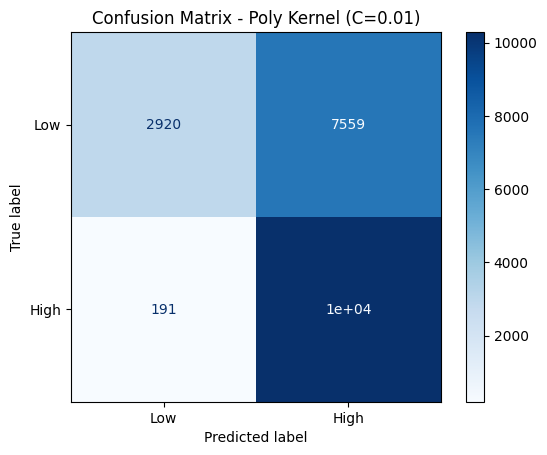


Kernel: Poly, C: 0.1
Accuracy: 0.7268
              precision    recall  f1-score   support

         Low       0.80      0.60      0.69     10479
        High       0.68      0.85      0.76     10481

    accuracy                           0.73     20960
   macro avg       0.74      0.73      0.72     20960
weighted avg       0.74      0.73      0.72     20960



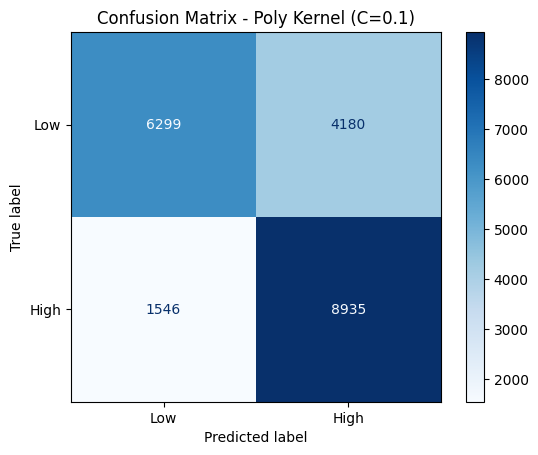


Kernel: Rbf, C: 0.001
Accuracy: 0.7176
              precision    recall  f1-score   support

         Low       0.82      0.56      0.66     10479
        High       0.66      0.88      0.76     10481

    accuracy                           0.72     20960
   macro avg       0.74      0.72      0.71     20960
weighted avg       0.74      0.72      0.71     20960



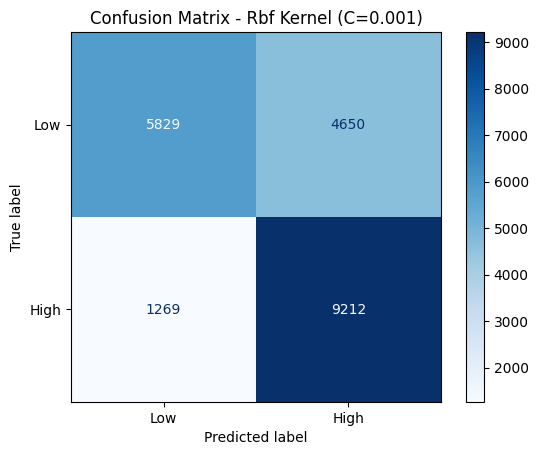


Kernel: Rbf, C: 0.01
Accuracy: 0.7368
              precision    recall  f1-score   support

         Low       0.81      0.62      0.70     10479
        High       0.69      0.86      0.76     10481

    accuracy                           0.74     20960
   macro avg       0.75      0.74      0.73     20960
weighted avg       0.75      0.74      0.73     20960



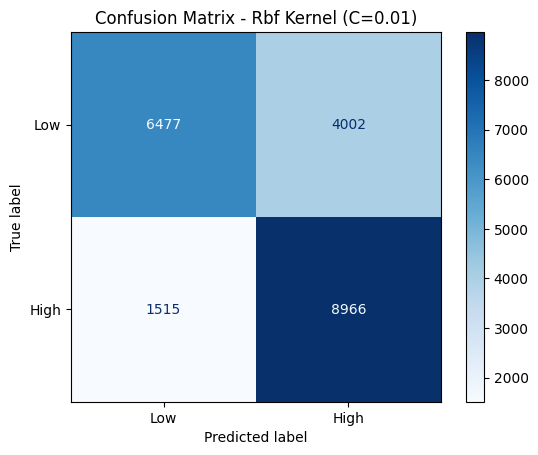


Kernel: Rbf, C: 0.1
Accuracy: 0.7494
              precision    recall  f1-score   support

         Low       0.82      0.64      0.72     10479
        High       0.70      0.86      0.77     10481

    accuracy                           0.75     20960
   macro avg       0.76      0.75      0.75     20960
weighted avg       0.76      0.75      0.75     20960



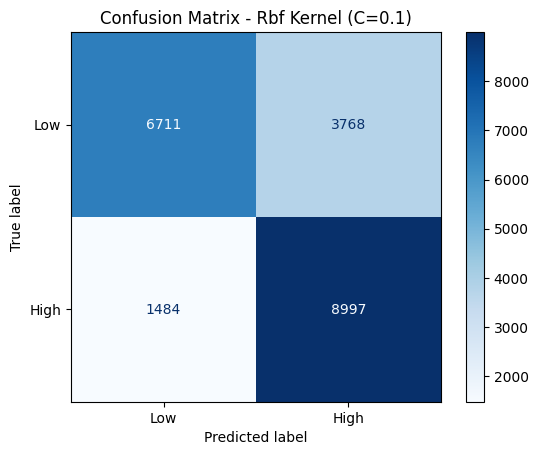

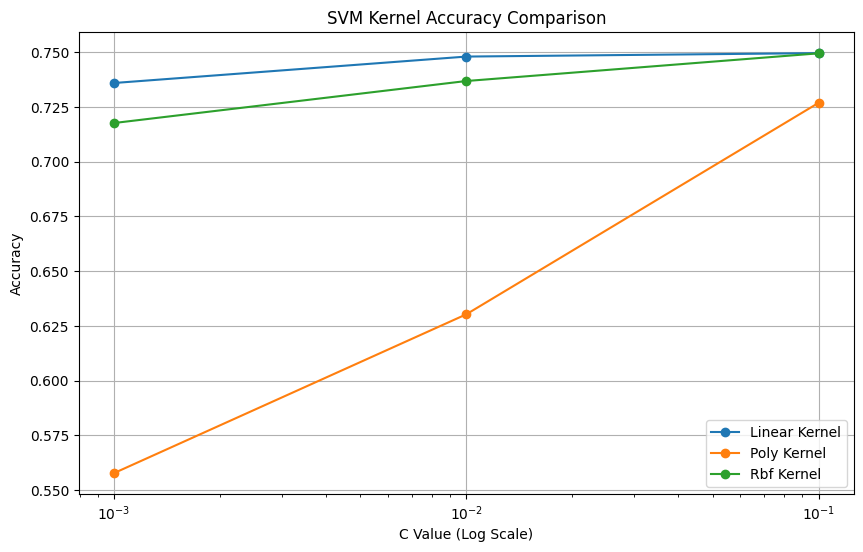

In [9]:
kernels = ['linear', 'poly', 'rbf']
C_values = [0.001, 0.01, 0.1]   # Smaller C values

# Dictionary to store accuracies for comparison
accuracies = {}

for kernel in kernels:
    accuracies[kernel] = []
    for C in C_values:
        print(f'\nKernel: {kernel.capitalize()}, C: {C}')

        # Create and train the SVM model
        svm_model = SVC(kernel=kernel, C=C, gamma='scale')
        svm_model.fit(X_train_scaled, y_train)

        # Predict using the model
        y_pred = svm_model.predict(X_test_scaled)

        # Evaluate accuracy
        acc = accuracy_score(y_test, y_pred)
        accuracies[kernel].append(acc)
        print(f'Accuracy: {acc:.4f}')

        # Classification report
        print(classification_report(y_test, y_pred, target_names=['Low', 'High']))

        # Confusion matrix
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Low', 'High'], cmap='Blues')
        plt.title(f'Confusion Matrix - {kernel.capitalize()} Kernel (C={C})')
        plt.show()

# Accuracy Comparison Plot
fig, ax = plt.subplots(figsize=(10, 6))
for kernel in kernels:
    ax.plot(C_values, accuracies[kernel], marker='o', label=f'{kernel.capitalize()} Kernel')

ax.set_xscale('log')
ax.set_xlabel('C Value (Log Scale)')
ax.set_ylabel('Accuracy')
ax.set_title('SVM Kernel Accuracy Comparison')
ax.legend()
plt.grid(True)
plt.show()
